In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv(r'D:\PHBS\MLF\final project\training.csv',index_col='id')
train.head()

,event,var1,var2,var3,var4,var5,var6,var7,var8,split
id,,,,,,,,,,
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev
3,1,1.0,2.096510e+07,NaN,NaN,NaN,NaN,NaN,62.75,dev
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dev


In [4]:
isnull_count = train.isnull().sum()
isnull_count

event         0
var1     105800
var2     121800
var3     192199
var4     160649
var5     230549
var6     232897
var7     211294
var8     137689
split         0
dtype: int64

In [8]:
count_0 = train['event'].value_counts()[0]
count_1 = train['event'].value_counts()[1]
count_0,count_1

(6032, 232804)

In [11]:
train = train.fillna(train.mean())
train.isnull().sum()

C:\Users\Haysen\AppData\Local\Temp\ipykernel_35548\3068383635.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean())


event    0
var1     0
var2     0
var3     0
var4     0
var5     0
var6     0
var7     0
var8     0
split    0
dtype: int64

In [12]:
Y_train = train.iloc[:,0]  
X_train = train.iloc[:,1:9]
X_train

,var1,var2,var3,var4,var5,var6,var7,var8
id,,,,,,,,
0,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
1,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
2,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
3,1.000000,2.096510e+07,16.772031,11.586977,289.199746,28.430493,20.646794,62.750000
4,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
...,...,...,...,...,...,...,...,...
238831,1.000000,6.523118e+04,16.772031,11.586977,289.199746,28.430493,20.646794,58.916667
238832,1.000000,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153
238833,1.873951,5.989773e+06,16.772031,11.586977,289.199746,28.430493,20.646794,58.497153


In [13]:
from sklearn.preprocessing import StandardScaler

#standardize the training data
sc = StandardScaler() 
sc.fit(X_train) 
X_train_std = sc.transform(X_train) 

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
import matplotlib.pyplot as plt
colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black', 'pink', 'lightgreen',
          'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    reg = LogisticRegression(penalty='l1', C=10.**c ,solver='liblinear',multi_class='ovr', random_state=0)
    reg.fit(X_train_std, Y_train)
    weights.append(reg.coef_)
    params.append(10**c)
weights = np.array(weights)

In [16]:
train.columns

Index(['event', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'split'],
      dtype='object')

In [17]:
weights

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          3.44821607e-01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00]],

       [[-2.65503448e-02,  1.17299934e-01,  2.01200770e-02,
          3.94949753e-01,  0.00000000e+00,  0.00000000e+00,
          5.04813870e-02,  8.78906247e-02]],

       [[-2.81262664e-02,  2.91847371e-01,  1.38163550e-01,
          3.96060051e-01,  0.00000000e+00,  0.00000000e+00,
          5.81354039e-02,  9.26471347e-02]],

       [[-2.82454005e-02,  3.17182947e-01,  1.60071726e-01,
          3.95946408e-01,  1.82127013e-03,  1.98889759e-04,
          5.88298503e-02,  9.26590741e-02]],

       [[-2.82573677e-02,  3.19810687e-01,  1.62404024e-01,
          3.95931322e-01,  2.13550709e-03,  4.35950050e-04,
          5.88977188e-02,  9.26548987e-02]],

    

In [18]:
weights = weights.reshape((10,8))
weights

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.44821607e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-2.65503448e-02,  1.17299934e-01,  2.01200770e-02,
         3.94949753e-01,  0.00000000e+00,  0.00000000e+00,
         5.04813870e-02,  8.78906247e-02],
       [-2.81262664e-02,  2.91847371e-01,  1.38163550e-01,
         3.96060051e-01,  0.00000000e+00,  0.00000000e+00,
         5.81354039e-02,  9.26471347e-02],
       [-2.82454005e-02,  3.17182947e-01,  1.60071726e-01,
         3.95946408e-01,  1.82127013e-03,  1.98889759e-04,
         5.88298503e-02,  9.26590741e-02],
       [-2.82573677e-02,  3.19810687e-01,  1.62404024e-01,
         3.95931322e-01,  2.13550709e-03,  4.35950050e-04,
         5.88977188e-02,  9.26548987e-02],
       [-2.82585626e-02,  3.200744

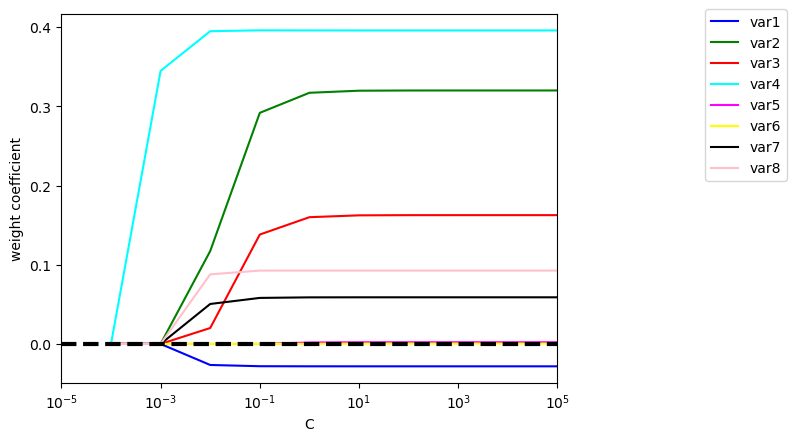

In [19]:
#select features by L1 penalty
ax = plt.subplot(111)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=train.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
bbox_to_anchor=(1.38, 1.03),
ncol=1, fancybox=True)
plt.show()

In [20]:
train.columns[column + 1]

'var8'

In [21]:
# character 2 and 4 are selected
X_train_selected = train[['var2','var4']]
sc = StandardScaler() 
sc.fit(X_train_selected) 
X_train_selected_std = sc.transform(X_train_selected) 

In [22]:
# character 1 and 2 and 4 and 8 are selected
X_train_selected_add = train[['var1','var2','var4','var8']]
sc = StandardScaler() 
sc.fit(X_train_selected_add) 
X_train_selected_add_std = sc.transform(X_train_selected_add) 

In [23]:
X_train_selected_add_std

array([[ 1.58651971e-16, -9.27056306e-16, -8.97408442e-16,
         1.30295920e-14],
       [ 1.58651971e-16, -9.27056306e-16, -8.97408442e-16,
         1.30295920e-14],
       [ 1.58651971e-16, -9.27056306e-16, -8.97408442e-16,
         1.30295920e-14],
       ...,
       [ 1.58651971e-16, -9.27056306e-16, -8.97408442e-16,
         1.30295920e-14],
       [-3.12221308e-01, -2.11598742e-01,  7.13853435e-01,
         7.15317894e-01],
       [ 1.58651971e-16, -9.27056306e-16, -8.97408442e-16,
         1.30295920e-14]])

In [24]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

# Test data

In [25]:
#standardize the test data
test = pd.read_csv(r'D:\PHBS\MLF\final project\test.csv',index_col='id')
Y_test = test['event']
X_test_selected = test[['var2','var4']]
X_test_selected = X_test_selected.fillna(X_test_selected.mean())
sc = StandardScaler() 
sc.fit(X_test_selected) 
X_test_selected_std = sc.transform(X_test_selected) 

In [26]:
isnull_count = test.isnull().sum()
isnull_count

event        0
var1     26290
var2     30310
var3     48178
var4     40351
var5     57604
var6     58187
var7     52886
var8     34458
split        0
dtype: int64

In [27]:
X_test_selected_add = test[['var1','var2','var4','var8']]  #add more variables
X_test_selected_add = X_test_selected_add.fillna(X_test_selected_add.mean())
sc = StandardScaler() 
sc.fit(X_test_selected_add) 
X_test_selected_add_std = sc.transform(X_test_selected_add) 

In [28]:
X_test_selected

,var2,var4
id,,
0,9.248254e+07,13.000000
1,6.126271e+06,4.000000
2,6.718715e+06,13.000000
3,3.576348e+06,13.000000
4,8.443072e+06,11.602955
...,...,...
59704,1.060430e+06,11.602955
59705,6.126271e+06,11.602955
59706,1.593264e+07,11.602955


In [29]:
X_test_selected_std

array([[ 3.82234037e+00,  7.12203620e-01],
       [ 2.06113103e-16, -3.87593198e+00],
       [ 2.62230195e-02,  7.12203620e-01],
       ...,
       [ 4.34053891e-01,  0.00000000e+00],
       [ 2.06113103e-16,  0.00000000e+00],
       [-2.27218545e-01,  0.00000000e+00]])

In [30]:
X_combined_std = np.vstack((X_train_selected_std, X_test_selected_std))
y_combined = np.hstack((Y_train, Y_test))

In [31]:
X_combined_std

array([[-9.27056306e-16, -8.97408442e-16],
       [-9.27056306e-16, -8.97408442e-16],
       [-9.27056306e-16, -8.97408442e-16],
       ...,
       [ 4.34053891e-01,  0.00000000e+00],
       [ 2.06113103e-16,  0.00000000e+00],
       [-2.27218545e-01,  0.00000000e+00]])

# Logistic Regression

C:\Users\Haysen\AppData\Local\Temp\ipykernel_944\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


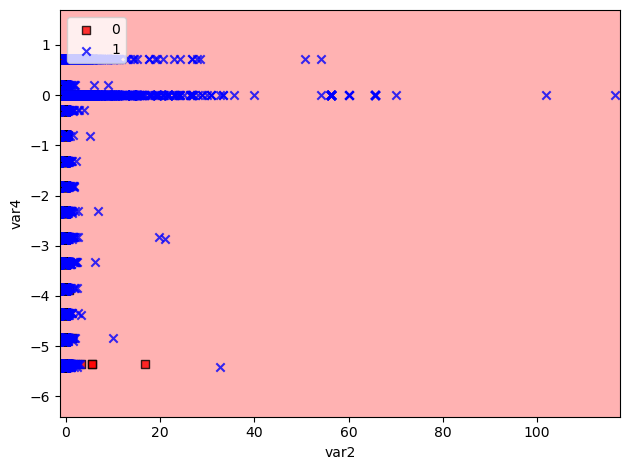

In [41]:
lr = LogisticRegression(C=1, random_state=2, solver='liblinear', multi_class='ovr')
lr.fit(X_train_selected_std, Y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=lr)
plt.xlabel('var2')
plt.ylabel('var4')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
lr.predict_proba(X_test_selected_std[:30, :])

array([[0.00324009, 0.99675991],
       [0.09903016, 0.90096984],
       [0.01607672, 0.98392328],
       [0.01703988, 0.98296012],
       [0.02078561, 0.97921439],
       [0.01816836, 0.98183164],
       [0.0177619 , 0.9822381 ],
       [0.01769407, 0.98230593],
       [0.02169224, 0.97830776],
       [0.01691136, 0.98308864],
       [0.02169224, 0.97830776],
       [0.01702018, 0.98297982],
       [0.01719943, 0.98280057],
       [0.01818542, 0.98181458],
       [0.01819343, 0.98180657],
       [0.01625412, 0.98374588],
       [0.01625412, 0.98374588],
       [0.01625412, 0.98374588],
       [0.01815433, 0.98184567],
       [0.02169224, 0.97830776],
       [0.17130744, 0.82869256],
       [0.02169224, 0.97830776],
       [0.02169224, 0.97830776],
       [0.01625412, 0.98374588],
       [0.02081942, 0.97918058],
       [0.01794741, 0.98205259],
       [0.01816366, 0.98183634],
       [0.0178577 , 0.9821423 ],
       [0.01820462, 0.98179538],
       [0.01592169, 0.98407831]])

In [43]:
y_pred = lr.predict(X_test_selected_std)
print('Test Accuracy: %.3f' % lr.score(X_test_selected_std, Y_test))

Test Accuracy: 0.975


In [71]:
y_pred[6976]

1

In [60]:
#use more variable to do the regression
lr = LogisticRegression(C=1, random_state=2, solver='liblinear', multi_class='ovr')
lr.fit(X_train_selected_add_std, Y_train)
y_pred = lr.predict(X_test_selected_add_std)
print('Test Accuracy: %.3f' % lr.score(X_test_selected_add_std, Y_test))

Test Accuracy: 0.975


# Confusion Matrix

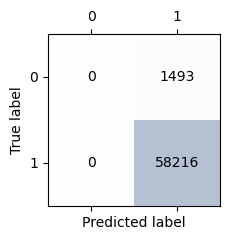

Precision: 0.975
Recall: 1.000
F1: 0.987


In [44]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred))

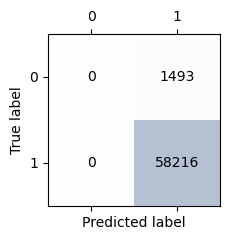

Precision: 0.975
Recall: 1.000
F1: 0.987


In [61]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred))

C:\Users\Haysen\AppData\Local\Temp\ipykernel_944\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


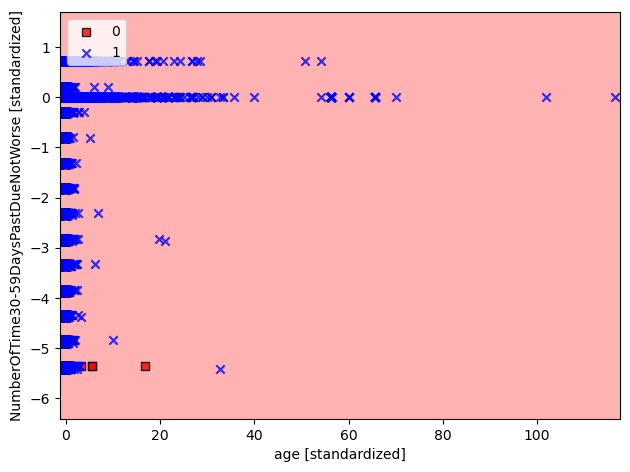

In [30]:
lr = LogisticRegression(C=10, random_state=1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_selected_std, Y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=lr)
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=6, 
                                    random_state=1)
tree_model.fit(X_train_selected_std, Y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

C:\Users\Haysen\AppData\Local\Temp\ipykernel_944\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


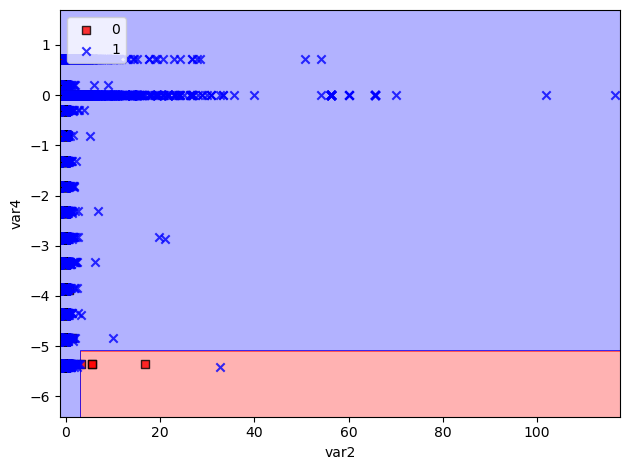

In [33]:
plot_decision_regions(X_combined_std, y_combined,classifier=tree_model)
plt.xlabel('var2')
plt.ylabel('var4')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [35]:
y_pred = tree_model.predict(X_test_selected_std)
print('Test Accuracy: %.3f' % tree_model.score(X_test_selected_std, Y_test))

Test Accuracy: 0.975


C:\Users\Haysen\AppData\Local\Temp\ipykernel_944\2412832179.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


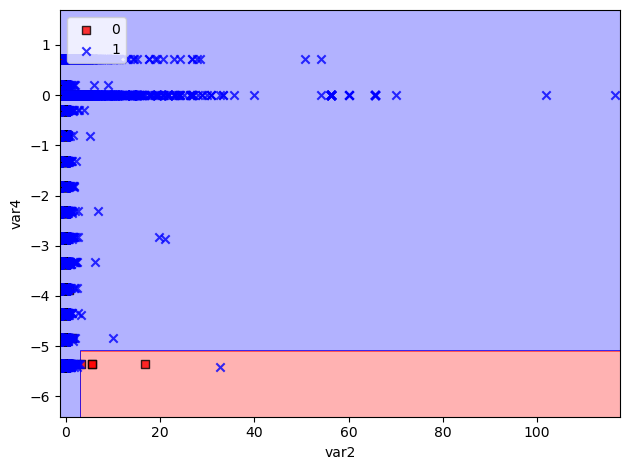

In [37]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=5, 
                                    random_state=1)
tree_model.fit(X_train_selected_std, Y_train)
plot_decision_regions(X_combined_std, y_combined,classifier=tree_model)
plt.xlabel('var2')
plt.ylabel('var4')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix

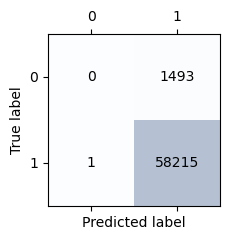

In [39]:
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred))

Precision: 0.975
Recall: 1.000
F1: 0.987


# Dealing with data imbalances

## Sub-Sampling

In [11]:
import pandas as pd
import numpy as np

In [15]:
train = pd.read_csv(r'D:\PHBS\MLF\final project\training.csv',index_col='id')
test = pd.read_csv(r'D:\PHBS\MLF\final project\test.csv',index_col='id')

In [16]:
# Calculate the number of missing values per row
train['missing_values_count'] = train.isna().sum(axis=1)

# Delete rows with a value of 1 in the first column and a missing value greater than 7
train = train.loc[~((train['event'] == 1) & (train['missing_values_count'] >= 7))]

# Delete the 'missing_values_count' column we created
train = train.drop(columns=['missing_values_count'])

In [17]:
count_0 = train['event'].value_counts()[0]
count_1 = train['event'].value_counts()[1]
count_0,count_1

(6032, 132564)

In [18]:
train = train.fillna(train.mean())
y_train = train.iloc[:,0]  
X_train = train.iloc[:,1:9]
# X_train = train[['var1','var2','var4','var8']]

y_test = test['event']
# X_test = test[['var1','var2','var4','var8']]
X_test = test.iloc[:,1:9]
X_test= X_test.fillna(X_test.mean())

C:\Users\Haysen\AppData\Local\Temp\ipykernel_14884\3856128939.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean())


In [19]:
count_0 = y_test.value_counts()[0]
count_1 = y_test.value_counts()[1]
count_0,count_1

(1493, 58216)

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
ros = RandomOverSampler(random_state=42,sampling_strategy=0.5)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [22]:
X_train.shape,y_train.shape

((198846, 8), (198846,))

In [396]:
count_0 = y_train.value_counts()[0]
count_1 = y_train.value_counts()[1]
count_0,count_1

(66282, 132564)

In [397]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# lr = LogisticRegression(C=1, random_state=2, solver='liblinear', multi_class='ovr')
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=6),
                        LogisticRegression(random_state=2,solver='liblinear',class_weight='balanced'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

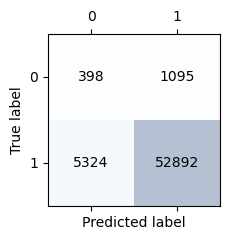

Precision: 0.070
Recall: 0.267
F1: 0.110
Test Accuracy: 0.892


In [398]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

# PR Curve

              precision    recall  f1-score   support

           0       0.03      1.00      0.05      1493
           1       0.99      0.00      0.00     58216

    accuracy                           0.03     59709
   macro avg       0.51      0.50      0.03     59709
weighted avg       0.96      0.03      0.00     59709



D:\anaconda\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.18477493861170202

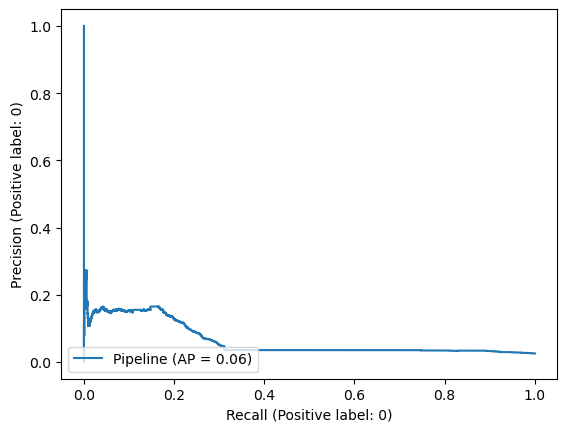

In [342]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report

y_pred_proba = pipe_lr.predict_proba(X_test)[:, 0]  # 获取预测概率 (注意这里修改为[:, 0])
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label=0)  # pos_label设置为0

# 画出PR曲线
plot_precision_recall_curve(pipe_lr, X_test, y_test, pos_label=0)  # pos_label设置为0

# 找到召回率>=0.5的最佳阈值
optimal_threshold = thresholds[np.argmax(recall >= 0.5)]
y_pred_custom_threshold = (y_pred_proba > optimal_threshold).astype(int)
y_pred_custom_threshold = 1 - y_pred_custom_threshold  # 将0和1的标签互换，因为我们关注的是0

print(classification_report(y_test, y_pred_custom_threshold))
optimal_threshold

# grid search

In [235]:
from sklearn.model_selection import GridSearchCV

param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='recall', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)


gs_1 = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs_1 = gs.fit(X_train, y_train)


print(gs.best_score_)
print(gs.best_params_)
print(gs_1.best_score_)
print(gs_1.best_params_)

0.84313976369574
{'logisticregression__C': 0.01}
0.84313976369574
{'logisticregression__C': 0.01}


# Try using XGBoost and Random Forest

# XGBoost

In [244]:
from xgboost import XGBClassifier

In [281]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
pipe_xgb = make_pipeline(StandardScaler(),
                        PCA(n_components=6),
                        XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
                        )
# class_weight='balanced'
pipe_xgb.fit(X_train, y_train)
y_pred = pipe_xgb.predict(X_test)

D:\anaconda\conda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


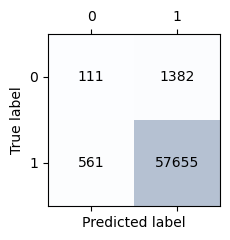

Precision: 0.165
Recall: 0.074
F1: 0.103
Test Accuracy: 0.967


In [282]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('Test Accuracy: %.3f' % pipe_xgb.score(X_test, y_test))

# Randon Forest

In [264]:
from sklearn.ensemble import RandomForestClassifier

In [266]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
pipe_rf = make_pipeline(StandardScaler(),
                        PCA(n_components=6),
                        RandomForestClassifier(random_state=42,class_weight='balanced')
                        )
# class_weight='balanced'
pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)

D:\anaconda\conda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


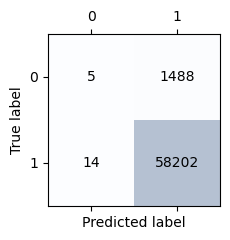

Precision: 0.263
Recall: 0.003
F1: 0.007
Test Accuracy: 0.975


In [267]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('Test Accuracy: %.3f' % pipe_rf.score(X_test, y_test))

# Pineline and balanced class with decision tree

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [227]:
pipe_dt = make_pipeline(StandardScaler(),
                        PCA(n_components=6),
                        DecisionTreeClassifier(random_state=1, class_weight='balanced'))
# pipe_dt = make_pipeline(StandardScaler(),
#                         PCA(n_components=6),
#                         DecisionTreeClassifier(random_state=1))
pipe_dt.fit(X_train, y_train)
y_pred = pipe_dt.predict(X_test)

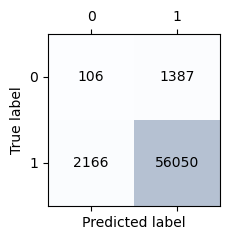

Precision: 0.047
Recall: 0.071
F1: 0.056
Test Accuracy: 0.940


In [228]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred,pos_label=0))
print('Test Accuracy: %.3f' % pipe_dt.score(X_test, y_test))

# Try to see if the performance will be better if there are only two variables¶

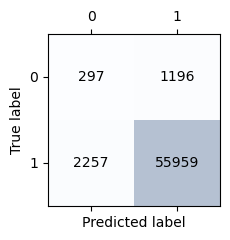

Precision: 0.116
Recall: 0.199
F1: 0.147
Test Accuracy: 0.942


In [68]:
ros = RandomOverSampler(random_state=42,sampling_strategy=0.5)
X_resampled, y_resampled = ros.fit_resample(X_train_selected_std, Y_train)

lr = LogisticRegression(C=1, random_state=2, solver='liblinear', multi_class='ovr')
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test_selected_std)

confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred,pos_label=0))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred,pos_label=0))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred,pos_label=0))
print('Test Accuracy: %.3f' % lr.score(X_test_selected_std, Y_test))